In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/Churn_Modelling.csv")
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [95]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [97]:
print(df.corr().Exited)

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64


In [98]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [99]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [100]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
X = df.iloc[:,3:13]
Y = df.iloc[:,13]

In [102]:
print(X)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [103]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [104]:
np.unique(X['Geography'])

array(['France', 'Germany', 'Spain'], dtype=object)

In [105]:
np.unique(X['Gender'])

array(['Female', 'Male'], dtype=object)

In [106]:
#creating dummy variable
geography = pd.get_dummies(X["Geography"],drop_first = True)# removing France column
gender = pd.get_dummies(X["Gender"],drop_first = True) #removing Female column

In [107]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [108]:
gender 

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [109]:
#adding modified columns to X
X = pd.concat([X,geography,gender],axis = 1)

In [110]:
print(X)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Germany  Spai

In [111]:
#Dropping unnecessary columns in X
X = X.drop(['Geography','Gender'],axis = 1)

In [112]:
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1   

In [201]:
#Splitting the data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.25,random_state = 45)

In [202]:
print("Xtrain",Xtrain.shape)
print("Xtest",Xtest.shape)
print("Ytrain",Ytrain.shape)
print("Ytest",Ytest.shape) 

Xtrain (7500, 11)
Xtest (2500, 11)
Ytrain (7500,)
Ytest (2500,)


In [203]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [204]:
print(Xtrain)

[[ 0.2493535   0.59179819  0.34177654 ... -0.57817139 -0.57078109
  -1.09930913]
 [ 0.9097213   0.11053624 -1.388796   ...  1.72959094 -0.57078109
  -1.09930913]
 [-0.24592234 -0.3707257  -0.69656698 ... -0.57817139 -0.57078109
  -1.09930913]
 ...
 [ 0.9097213  -1.23699721 -0.69656698 ... -0.57817139 -0.57078109
  -1.09930913]
 [ 0.37317246 -0.08196854 -1.7349105  ... -0.57817139 -0.57078109
   0.90966223]
 [ 0.23903526  0.30304102 -0.35045248 ... -0.57817139 -0.57078109
  -1.09930913]]


In [205]:
print(Xtest)

[[-1.13329156 -1.04449243  0.34177654 ... -0.57817139  1.75198515
  -1.09930913]
 [-0.12210338  1.07306014 -1.388796   ...  1.72959094 -0.57078109
   0.90966223]
 [ 0.4247637   2.03558404  0.34177654 ... -0.57817139 -0.57078109
  -1.09930913]
 ...
 [ 0.5795374   1.74682687  0.68789105 ... -0.57817139  1.75198515
   0.90966223]
 [ 0.16680753  0.39929341 -0.00433797 ... -0.57817139  1.75198515
   0.90966223]
 [-1.14360981 -0.08196854  1.03400555 ... -0.57817139  1.75198515
   0.90966223]]


# Part 2 [ANN]

In [206]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [207]:
#creating object to Sequential
model = Sequential()

In [208]:
#Hidden Layer 1
model.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu',input_dim = 11))
#model.add(Dropout(0.5))
#Hidden Layer 2
model.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu'))
#model.add(Dropout(0.3))
#output layer
model.add(Dense(units = 1,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'))

In [209]:
#compiling
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [210]:
#fitting the model
cl = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs = 10,batch_size = 70)

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 1s 86us/step - loss: 0.5656 - acc: 0.7299 - val_loss: 0.5121 - val_acc: 0.7848
Epoch 2/10
7500/7500 [==============================] - 0s 20us/step - loss: 0.4936 - acc: 0.7975 - val_loss: 0.4774 - val_acc: 0.7988
Epoch 3/10
7500/7500 [==============================] - 0s 20us/step - loss: 0.4675 - acc: 0.8047 - val_loss: 0.4601 - val_acc: 0.8016
Epoch 4/10
7500/7500 [==============================] - 0s 20us/step - loss: 0.4515 - acc: 0.8076 - val_loss: 0.4481 - val_acc: 0.8060
Epoch 5/10
7500/7500 [==============================] - 0s 20us/step - loss: 0.4404 - acc: 0.8115 - val_loss: 0.4397 - val_acc: 0.8100
Epoch 6/10
7500/7500 [==============================] - 0s 20us/step - loss: 0.4328 - acc: 0.8128 - val_loss: 0.4346 - val_acc: 0.8116
Epoch 7/10
7500/7500 [==============================] - 0s 19us/step - loss: 0.4272 - acc: 0.8145 - val_loss: 0.4305 - val_acc: 0.8124
Epoch 8

In [211]:
print(cl.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


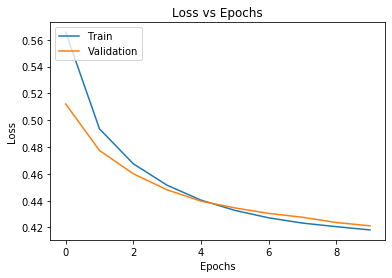

In [212]:
#Visualization for Loss
plt.plot(cl.history['loss'],label = 'Train')
plt.plot(cl.history['val_loss'],label = 'Validation')
plt.title("Loss vs Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper left')
plt.show()

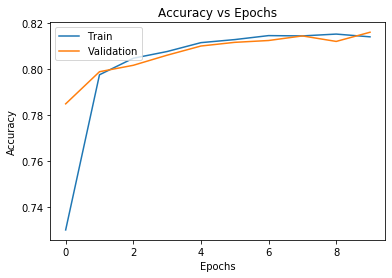

In [213]:
#Visualization for accuracy
plt.plot(cl.history['acc'],label = 'Train')
plt.plot(cl.history['val_acc'],label = 'Validation')
plt.title("Accuracy vs Epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')
plt.show()

# Part 3 [Predictions]

In [214]:
#prediction
Ypred = model.predict(Xtest)
print(Ypred)
print(Ypred.shape)
Ypred = np.round(Ypred)
print(Ypred)


[[0.1432758 ]
 [0.4594944 ]
 [0.52324945]
 ...
 [0.32915828]
 [0.16066381]
 [0.06290123]]
(2500, 1)
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [215]:
np.unique(Ypred)

array([0., 1.], dtype=float32)

In [216]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest,Ypred))

[[1941   47]
 [ 413   99]]


In [217]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(Ytest,Ypred))

Accuracy 0.816
